# Forecasting AI and ML Job Trends with SARIMA

Here, we filter out AI/ML/DS jobs using Keyword Matching

## Dependencies

In [397]:
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

from wordcloud import WordCloud

## Data Loading

In [398]:
filename = "data/a_job_postings_normalized.parquet"
job_postings = pd.read_parquet(filename)

In [399]:
print(f"{len(job_postings):,} job postings loaded from {filename}")
job_postings.sample(5)

1,296,381 job postings loaded from data/a_job_postings_normalized.parquet


,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count
265616,2024-01-19 09:45:09.215838+00,t,t,f,solution architect- tms,manhattan associates,"wokingham, england, united kingdom",2024-01-12,high wycombe,united kingdom,architect,mid senior,onsite,"[tms (transport management systems), supply ch...",35
193149,2024-01-19 09:45:09.215838+00,t,t,f,accounting manager,spartan capital group,detroit metropolitan area,2024-01-12,oak park,united states,accountant,mid senior,onsite,"[accounting, cost accounting, leadership, ment...",19
960589,2024-01-21 02:23:07.117356+00,t,t,f,systems engineer,motion recruitment,"atlantic city, nj",2024-01-14,ocean city,united states,agricultural-research engineer,mid senior,onsite,"[virtualization, vmware esxi, windows server, ...",12
1030730,2024-01-21 16:27:09.836573+00,t,t,f,registered nurse/rn,rcm health care services,"easton, md",2024-01-14,easton,united states,nurse practitioner,mid senior,onsite,"[registered nurse, critical care, intensive ca...",22
754036,2024-01-19 17:26:04.40497+00,t,t,f,"joint use administrator i/ii - fredericksburg, va",vetjobs,"fredericksburg, va",2024-01-14,livingston,united states,historic-site administrator,mid senior,onsite,"[joint use administrator i or ii, electric dis...",30


## Job Filtering using Keyword Matching

Use 150 most common AI/ML job terms

In [400]:
ai_ml_terms = """
artificial intelligence, machine learning, deep learning, neural networks, computer vision, natural language processing, large language model, reinforcement learning, supervised learning, unsupervised learning, semi-supervised learning, transfer learning, predictive modeling, classification, regression, clustering, convolutional neural networks, cnn, rnn, long short-term memory, lstm, gan, generative adversarial networks, support vector machine, svm, random forests, decision trees, ensemble learning, feature engineering, feature selection, data preprocessing, data mining, big data, data science, data analysis, data visualization, sentiment analysis, chatbots, speech recognition, image recognition, object detection, time series analysis, recommender systems, autonomous systems, robotics, chatbot development, nlp algorithms, tensorFlow, keras, pytorch, scikit-learn, openai, machine learning algorithms, model training, model evaluation
"""

ai_ml_frameworks = """
Python, R, Julia, SQL, Apache Spark, Databricks, Jupyter Notebook, Google Cloud AI Platform, Amazon SageMaker, Microsoft Azure Machine Learning, Docker, Kubernetes, Git, GitHub, Anaconda, Weights & Biases, MLflow, Apache Kafka, Airflow, Tableau, Power BI, Looker, MATLAB, Scala, C++, Java, PySpark, Databricks, Snowflake, BigQuery, Vertex AI, OpenCV, NLTK, spaCy, Gensim, Hugging Face Transformers, Ray, Dask, Kedro, DVC (Data Version Control), Great Expectations, Kedro, Weights & Biases, Streamlit, FastAPI, Dash, Flask, XGBoost, LightGBM
"""

ai_ml_acronyms = """
RAG, LLM, GenAI, ML, DL, NLP, CV, RL, GAN, CNN, RNN, LSTM, SVM, SAA, AGI, AIoT, HCI, TF, PyTorch, KNN, SVD, BERT, GPT, T5, VAE, BIM, BOM, IoT, CICD, MLOps, AI/ML, API, RPA, ETL, DNN, RNN, BFS, AIaaS, MLaaS, DLaaS, Jupyter, K8s, EDA, RNN, BERT, VQA, CVPR, MT, FL, AI-ML, Keras, XLNet
"""

ai_terms_list = [item.strip() for item in ai_ml_terms.split(",")]
ai_ml_frameworks_list = [item.strip() for item in ai_ml_frameworks.split(",")]
ai_acronyms_list = [item.strip() for item in ai_ml_acronyms.split(",")]

ai_ml_keywords = set(ai_terms_list + ai_ml_frameworks_list + ai_acronyms_list)

print(f"Number of AI/ML keywords: {len(ai_ml_keywords)}")


Number of AI/ML keywords: 150


Job post filtering using vectorized pandas string operations

In [401]:
def combine_row_text(row):
    return f"{row['job_title']} {row['search_position']} {row['company']} {', '.join(row['job_skills'])}".lower()

def filter_ai_ml_jobs(df):
    # Convert keywords to lowercase pattern once, using word boundaries
    pattern = '|'.join(r'\b' + re.escape(keyword.lower()) + r'\b' for keyword in ai_ml_keywords)

    # Combine columns into a single text column
    combined_text = df.apply(combine_row_text, axis=1)

    # Vectorized case-insensitive search
    mask = combined_text.str.contains(pattern, regex=True)
    return df[mask]

In [402]:
ai_ml_jobs = filter_ai_ml_jobs(job_postings)

In [403]:
print(f"Number of AI/ML jobs: {ai_ml_jobs.shape[0]:,}")

print(f"Percentage of AI/ML jobs: {ai_ml_jobs.shape[0] / job_postings.shape[0]:.2%}")

Number of AI/ML jobs: 181,332
Percentage of AI/ML jobs: 13.99%


In [404]:
ai_ml_jobs.head()

,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count
14,2024-01-21 02:01:10.496553+00,t,t,f,"senior associate, tax - product analyst",kpmg us,"chicago, il",2024-01-14,calumet city,united states,stand-in,associate,onsite,"[microsoft office suite, uml, flow charting so...",20
21,2024-01-21 06:01:19.472942+00,t,t,f,test conductor - space systems,northrop grumman,"gilbert, az",2024-01-15,chandler,united states,conductor,mid senior,onsite,"[electrical engineering, requirements derivati...",13
23,2024-01-21 06:01:12.676071+00,t,t,f,"builder territory manager - seattle , wa",shaw industries,"seattle, wa",2024-01-16,bellevue,united states,exhibit builder,mid senior,onsite,"[flooring sales, interior design, sales, commu...",17
25,2024-01-21 06:01:13.56896+00,t,t,f,property manager,knight dragon ltd,"royal borough of greenwich, england, united ki...",2024-01-14,basildon,united kingdom,river,mid senior,onsite,"[english (language), cv (document), europe (lo...",5
27,2024-01-21 06:01:13.73724+00,t,t,f,bombardier - agent de sécurité,securitas canada,"montreal, quebec, canada",2024-01-14,côte-saint-luc,canada,safety manager,mid senior,onsite,"[security guard, aviation security, access con...",16


Plot the top N AI and ML skills in demand.

In [405]:
def visualize_skill_demand(df, top_n=20, min_liklihood=0):
    title = (
        f"Top {top_n} AI and ML Skills in Demand (> {min_liklihood} Likelihood count)"
        if min_liklihood > 0
        else f"Top {top_n} AI and ML Skills in Demand"
    )
    all_skills = [skill for sublist in df["job_skills"] for skill in sublist]
    skill_counts = Counter(all_skills)

    top_k_skills = skill_counts.most_common(top_n)
    skills, counts = zip(*top_k_skills)

    plt.figure(figsize=(8, 6))
    plt.barh(skills, counts, color="blue", alpha=0.9)
    plt.title(title)
    plt.xlabel("Number of Job Postings")
    # plt.ylabel('Skills')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.show()

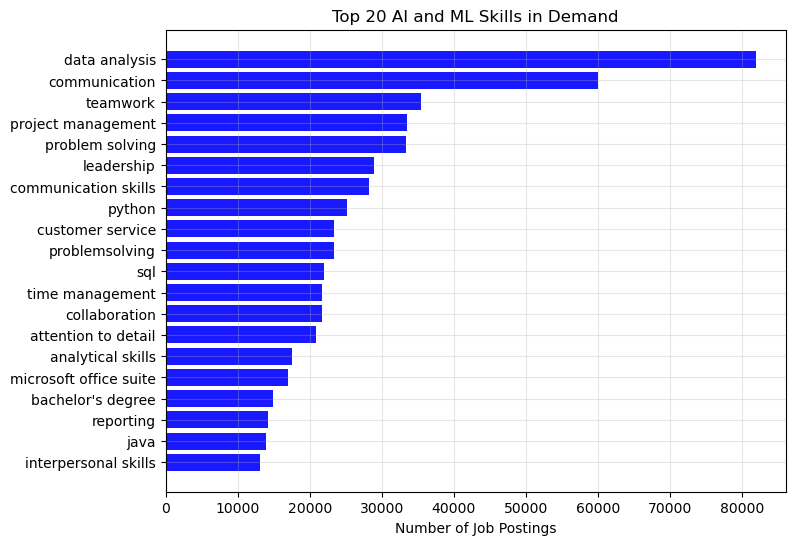

In [406]:
visualize_skill_demand(ai_ml_jobs, top_n=20, min_liklihood=0)

## Job Filtering Using Keyword Likelihood

In [407]:
def classify_with_keywords(df):
    # Combine relevant columns into a single text column
    combined_text = df.apply(
        lambda row: combine_row_text(row),
        axis=1,
    )

    # Create a pattern with word boundaries for all keywords
    pattern = "|".join(
        r"\b" + re.escape(keyword.lower()) + r"\b" for keyword in ai_ml_keywords
    )

    # Count occurrences of keywords in the combined text
    df["keyword_count"] = combined_text.str.count(pattern, flags=re.IGNORECASE)

    # Calculate likelihood and reason
    df["keyword_likelihood"] = df["keyword_count"].apply(
        lambda count: min(100, int((count / len(ai_ml_keywords)) * 100))
    )
    # df["keyword_reason"] = df["keyword_count"].apply(
    #     lambda count: f"Found {count} AI/ML/DS keywords in job title and skills."
    # )

    return df


In [ ]:
job_postings = classify_with_keywords(job_postings)

In [ ]:
ai_ml_ds_jobs = job_postings[job_postings["keyword_likelihood"] > 0]

In [ ]:
print(f"Number of potential AI/ML jobs: {ai_ml_ds_jobs.shape[0]:,}")

Number of potential AI/ML jobs: 62,621


In [ ]:
ai_ml_ds_jobs.sample(5)

,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count,keyword_count,keyword_likelihood
678451,2024-01-19 09:45:09.215838+00,t,t,f,postdoctoral scholar,berkeley lab,"berkeley, ca",2024-01-13,concord,united states,pathologist,associate,onsite,"[python, modelica, fmi, fdd, psycho, hvac, psy...",21,2,1
11282,2024-01-21 14:27:06.735247+00,t,t,f,mortgage loan officer with in-house agents and...,your way home,"kennewick, wa",2024-01-14,kennewick,united states,buyer,mid senior,onsite,"[mortgage origination, real estate, loan proce...",18,2,1
1036574,2024-01-21 06:50:06.830682+00,t,t,f,first year tax professional,h&r block,"d'iberville, ms",2024-01-14,magnolia,united states,accountant cost,mid senior,onsite,"[client service, retail experience, sales, mar...",20,2,1
701511,2024-01-19 09:45:09.215838+00,t,t,f,medical lab scientist i - blood bank (evening ...,sonora quest laboratories/ laboratory sciences...,"phoenix, az",2024-01-13,glendale,united states,microbiologist,mid senior,onsite,"[medical technology, clinical laboratory scien...",33,2,1
209817,2024-01-19 09:45:09.215838+00,t,t,f,senior audit manager of innovation and analyti...,u.s. bank,"irving, tx",2024-01-13,garland,united states,director stage,mid senior,onsite,"[data analytics, data science, continuous audi...",37,6,4


In [ ]:
ai_ml_ds_jobs.to_parquet("data/b_job_postings_ai_ml_ds.parquet")

## Keyword Analysis

Filter the DataFrame based on the minimum keyword likelihood.

In [ ]:
def filter_by_likelihood(df, min_likelihood=0):
    return df[df["keyword_likelihood"] >= min_likelihood]

Plot the distribution of keyword likelihood across job postings.

In [ ]:
def plot_keyword_likelihood_distribution(df, min_liklihood=0):    
    likelihood_distribution = (
    df["keyword_likelihood"]
        .value_counts()
        .sort_index()
    )

    plt.figure(figsize=(8, 5))
    likelihood_distribution.plot(kind="bar", color="blue", alpha=0.7)
    plt.title(f"Distribution of Keyword Likelihood Count (> {min_liklihood})")
    plt.xlabel("Keyword Likelihood")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()

Perform frequency analysis of AI-related skills across job postings.

In [ ]:
def frequency_analysis_of_skills(df):
    all_skills = [skill.lower() for skills in df["job_skills"] for skill in skills]
    return Counter(all_skills)

Create a word cloud visualization of popular AI skills

In [ ]:
def create_word_cloud(df):
    skill_counts = frequency_analysis_of_skills(df)

    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(skill_counts)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
def analyze_jobs(min_likelihood = 5):
    filtered_jobs = filter_by_likelihood(ai_ml_ds_jobs, min_likelihood=min_likelihood)
    
    display(Markdown(f"### **Keword Analysis for Mimumum Likelihood count of {min_likelihood}**"))
    display(Markdown(f"Percentage of jobs with at least {min_likelihood} likelihood count: **{filtered_jobs.shape[0] / job_postings.shape[0]:.2%}**"))
    display(Markdown(f"Number of jobs with at least {min_likelihood} likelihood count: **{filtered_jobs.shape[0]:,}**"))

    plot_keyword_likelihood_distribution(filtered_jobs, min_liklihood=min_likelihood)

    visualize_skill_demand(filtered_jobs, top_n=20, min_liklihood=min_likelihood)

    create_word_cloud(filtered_jobs)

### **Keword Analysis for Mimumum Likelihood count of 0**

Percentage of jobs with at least 0 likelihood count: **4.83%**

Number of jobs with at least 0 likelihood count: **62,621**

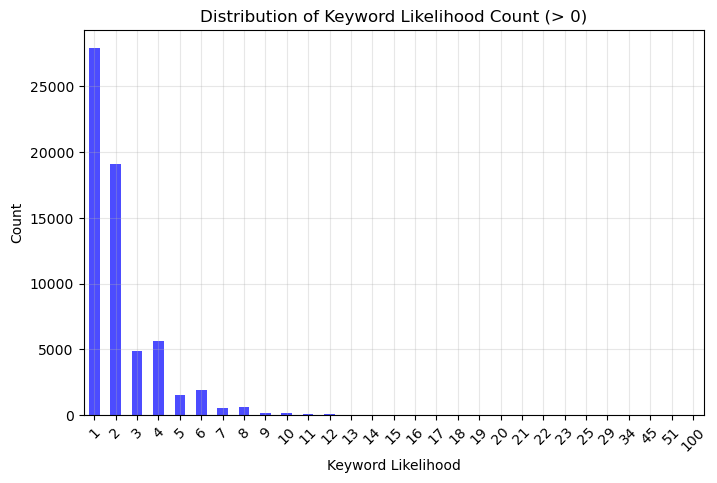

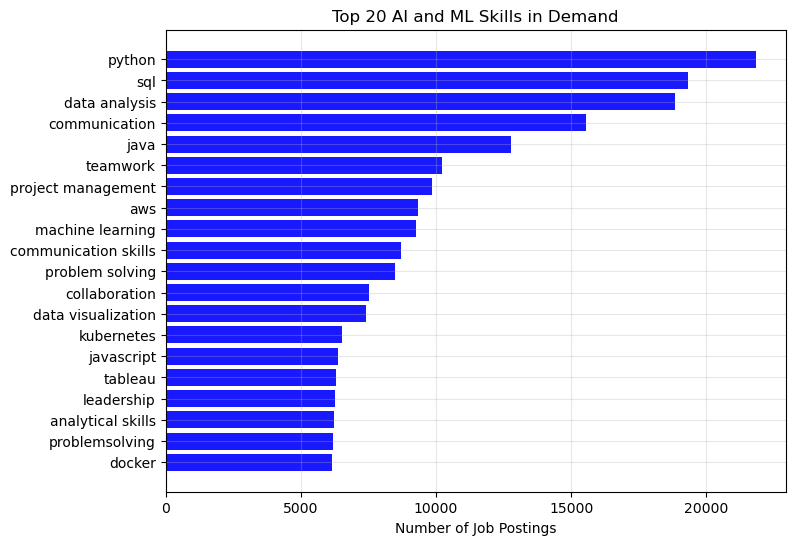

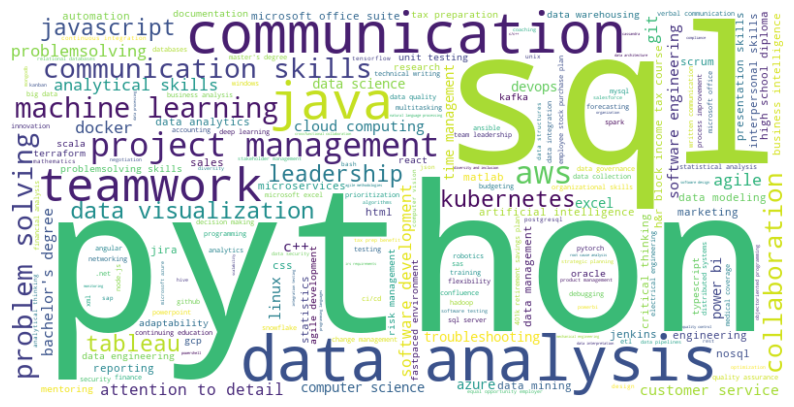

In [ ]:
analyze_jobs(min_likelihood=0)

### **Keword Analysis for Mimumum Likelihood count of 8**

Percentage of jobs with at least 8 likelihood count: **0.09%**

Number of jobs with at least 8 likelihood count: **1,175**

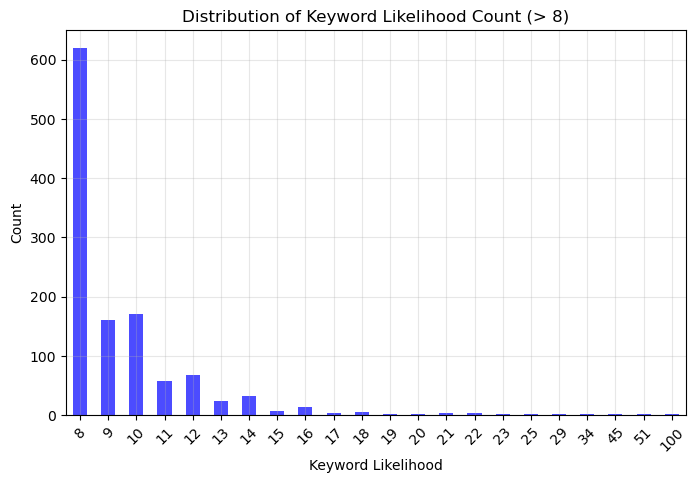

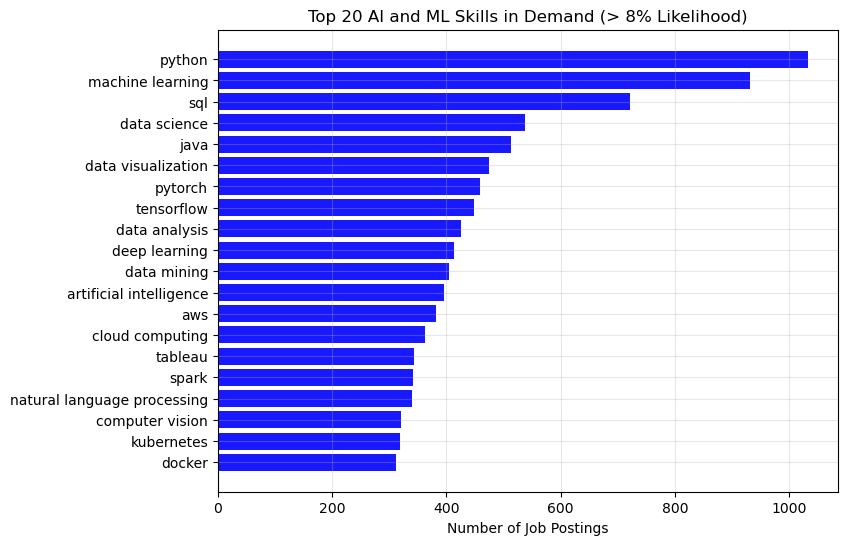

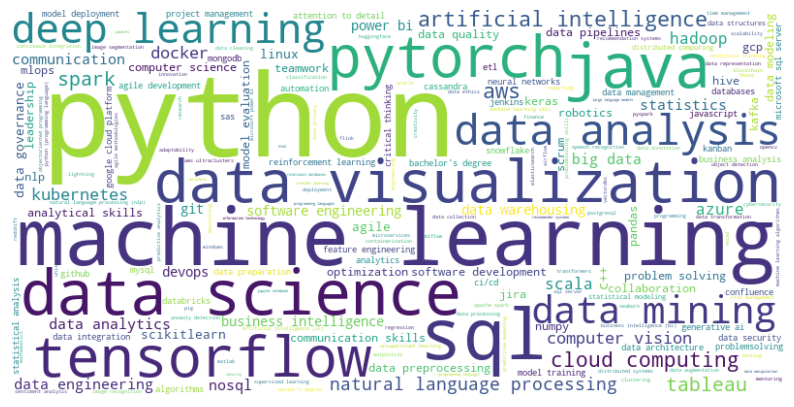

In [ ]:
analyze_jobs(min_likelihood=8)